In [1]:
# installing the necessary library
!pip install pyreadr statsmodels 

In [2]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline 

In [3]:
plt.rcParams['figure.figsize'] = (15, 6)  # overwrite the default figure size
plt.rcParams['axes.grid'] = True          # add the grid lines by default   

# Temperatures in Eskdalemuir
We first look at the temperatures recorded in Eskdalemuir.

As it is a .RData file, we'll need to use the `pyreadr` library to load in the data

In [4]:
timeseries_data = pyreadr.read_r('../../data/week2/esktem.RData')

df = pd.DataFrame(
    timeseries_data['esktem'].values, 
    index=pd.date_range('Jan-1914', 'Jun-2018', freq='M')
).rename(columns={0:'esktem'})

We can now plot the data.

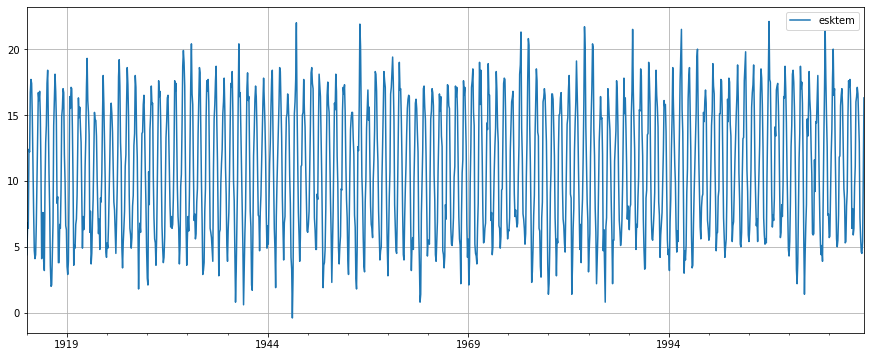

In [5]:
df.plot()

We can now plot the STL.

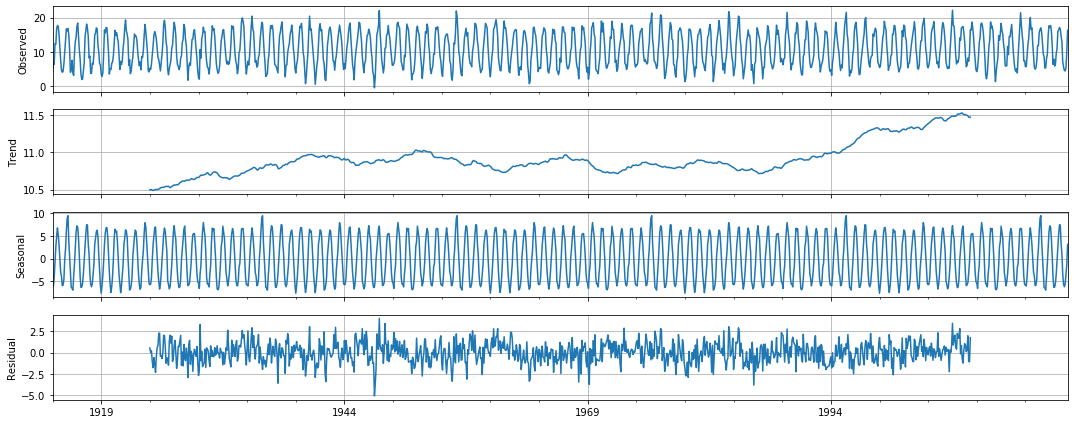

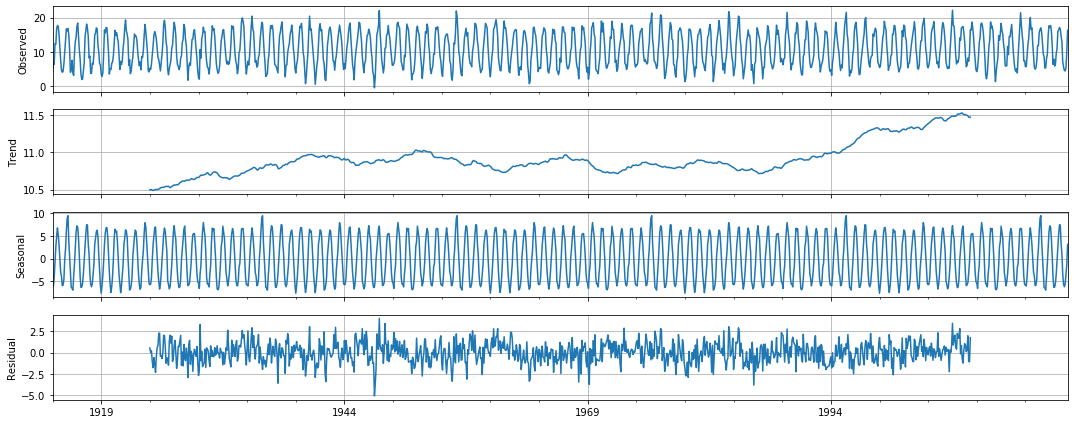

In [6]:
seasonal_decompose(df, freq=240).plot()

The `seasonal_decompose` function sometimes needs a little “help” to get the degree of smoothness of the components right. 
This can be done by setting the width of the window of the smoother. We have manually set the window for the trend to 240, which produces a smoother trend.

If you are wondering how Python knows what the prediod of the seasonal effect is. It obtains this from the frequency information stored in the time series data.

It is important this value is set correctly before using `seasonal_decompose`.

# Atmospheric CO2 in Mauna Loa

We start by loading the data as a ts object, which we have stored in an earlier step.

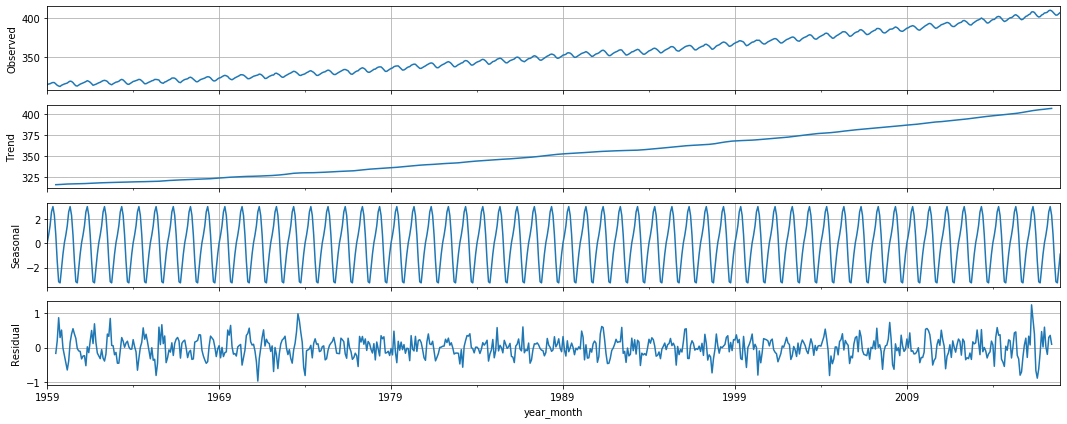

In [7]:
df = pd.read_csv("../../data/week2/maunaloa.csv", parse_dates=[['year', 'month']], index_col=0)

seasonal_decompose(df['average']).plot();